# Text Classification

**Problem Statement:** Given a dataset of articles and their publishers, build an NLP pipeline and model that can predict the name of the publisher. 

Dataset taken from Google BigQuery public datasets

## Import Tensorflow 2.0

In [0]:
try:
  %tensorflow_version 2.x
except Exception:
  pass  

TensorFlow 2.x selected.


## Necessary Imports

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, Bidirectional, Dense, GRU, Embedding, Dropout
from tensorflow.keras.models import Model,Sequential 
%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the dataset

Load the dataset and visualize them

In [0]:
dataframe=pd.read_csv('datasets/full_data.csv', nrows=92000)

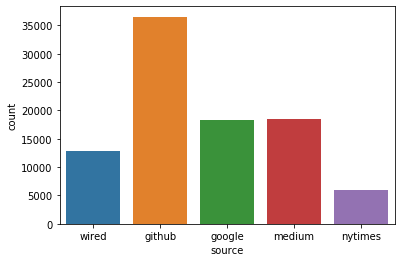

In [0]:
sns.countplot(dataframe['source'])

## Preprocess the dataset

X denotes the articles' titles.

Y denotes the publisher's name.

1) Convert the publisher's name into categorical numbers. Use LabelEncoder from Scikit Learn library for this.

2) Convert article names into vector of integers.

3) This can be done by using Tokenizer class by Keras.

4) Tokenizing is nothing but splitting the words present in a sentence into an array of words. 

5) These arrays of words are mapped to specific integer value which represents their weights.

6) fit_on_texts() function converts sentences into words

7) texts_to_sequences() function converts there array of words into array of integer vectors for each sentence.

In [0]:
X=dataframe['title'].values
Y=dataframe['source'].values
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)
Y=to_categorical(Y)
tokenizer = Tokenizer(num_words=2500, split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

## Train Test split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

# Building the model

We'll use Tensorflow's keras high level API for building the model.

**Neural Network Architecture**

* Embedding layer (Input layer)
* Gated Recurrent Unit that returns sequences
* Gated Recurrent Unit 
* Dropout to prevent overfitting
* Dense layer to reduce to linearities
* Output layer - Dense of 5 classes

In [0]:
def GRU_model():
  model = Sequential()
  model.add(Embedding(2500,128,input_length=X.shape[1]))
  model.add(GRU((64), return_sequences=True))
  model.add(GRU((32)))
  model.add(Dropout(0.2))
  model.add(Dense(8,activation='relu'))
  model.add(Dense(5,activation='softmax'))
  model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
  return model

In [0]:
model = GRU_model()

## Train the model

In [0]:
history=model.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test),batch_size=500)

Train on 73600 samples, validate on 18400 samples
Epoch 1/30
73600/73600 [==============================] - 30s 414us/sample - loss: 1.1698 - accuracy: 0.5236 - val_loss: 0.9174 - val_accuracy: 0.6522
Epoch 2/30
73600/73600 [==============================] - 27s 365us/sample - loss: 0.8904 - accuracy: 0.6677 - val_loss: 0.8821 - val_accuracy: 0.6671
Epoch 3/30
73600/73600 [==============================] - 27s 367us/sample - loss: 0.8480 - accuracy: 0.6829 - val_loss: 0.8626 - val_accuracy: 0.6712
Epoch 4/30
73600/73600 [==============================] - 27s 367us/sample - loss: 0.8188 - accuracy: 0.6937 - val_loss: 0.8556 - val_accuracy: 0.6709
Epoch 5/30
73600/73600 [==============================] - 27s 366us/sample - loss: 0.7954 - accuracy: 0.7028 - val_loss: 0.8464 - val_accuracy: 0.6778
Epoch 6/30
73600/73600 [==============================] - 27s 369us/sample - loss: 0.7762 - accuracy: 0.7109 - val_loss: 0.8451 - val_accuracy: 0.6815
Epoch 7/30
73600/73600 [====================

## Evaluate

The model is overfitting and it is not performing well

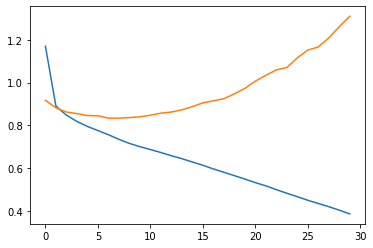

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Sampling

We have class imbalance in our dataset. We can overcome that issue by using sampling methods.

In [0]:
dataframe[dataframe['source']=='github'].shape

(36525, 3)

In [0]:
class1=dataframe[dataframe['source']=='wired']
class2=dataframe[dataframe['source']=='google']
class3=dataframe[dataframe['source']=='nytimes']
class4=dataframe[dataframe['source']=='medium']

## Oversampling

Choose random data from each class and append it with the respective existing dataset classes.

In [0]:
class1_new=class1[0:int(class1.shape[0]*1)]
class2_new=class2[0:int(class2.shape[0]*0.4)]
class3_new=class3
class4_new=class4[0:int(class2.shape[0]*0.3)]

for i in range(1):
  class1_new=pd.concat([class1_new,class1])

for i in range(1):
  class2_new=pd.concat([class2_new,class2])
  
for i in range(5):
  class3_new=pd.concat([class3_new,class3])

for i in range(1):
  class4_new=pd.concat([class4_new,class4])

dataframe1=pd.concat([dataframe,class1_new,class2_new,class3_new,class4_new])

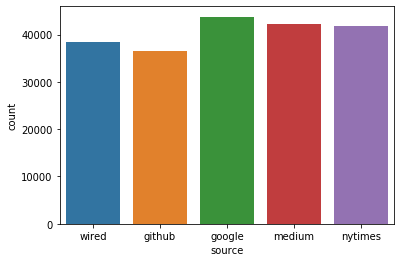

In [0]:
sns.countplot(dataframe1['source'])

## Preprocess again

In [0]:
X=dataframe1['title'].values
Y=dataframe1['source'].values
encoder=LabelEncoder()
Y=encoder.fit_transform(Y)
Y=to_categorical(Y)
tokenizer = Tokenizer(num_words=2500,split=' ')
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)
X = pad_sequences(X)

## Train Test split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

## Train

In [0]:
model = GRU_model()

In [0]:
history=model.fit(X_train,Y_train,epochs=30,validation_data=(X_test,Y_test),batch_size=500)

Train on 162372 samples, validate on 40593 samples
Epoch 1/30
162372/162372 [==============================] - 65s 398us/sample - loss: 1.2610 - accuracy: 0.4499 - val_loss: 1.0787 - val_accuracy: 0.5671
Epoch 2/30
162372/162372 [==============================] - 62s 380us/sample - loss: 0.9761 - accuracy: 0.6260 - val_loss: 0.8970 - val_accuracy: 0.6652
Epoch 3/30
162372/162372 [==============================] - 61s 378us/sample - loss: 0.8599 - accuracy: 0.6815 - val_loss: 0.8438 - val_accuracy: 0.6890
Epoch 4/30
162372/162372 [==============================] - 62s 380us/sample - loss: 0.8022 - accuracy: 0.7059 - val_loss: 0.8097 - val_accuracy: 0.7045
Epoch 5/30
162372/162372 [==============================] - 62s 380us/sample - loss: 0.7523 - accuracy: 0.7279 - val_loss: 0.7743 - val_accuracy: 0.7182
Epoch 6/30
162372/162372 [==============================] - 62s 379us/sample - loss: 0.7026 - accuracy: 0.7472 - val_loss: 0.7389 - val_accuracy: 0.7359
Epoch 7/30
162372/162372 [=====

## Evaluate

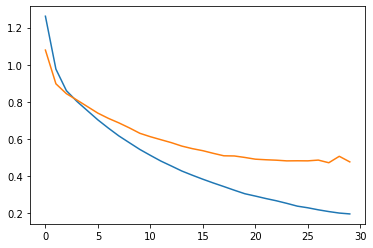

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Save the model

In [0]:
model.save_weights('models/article.h5')